<a href="https://colab.research.google.com/github/JumpNShootMan/TP_MachineLearning/blob/Develop/TP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabajo Parcial de Machine Learning


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

In [2]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

     |████████████████████████████████| 25.0MB 171kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 147kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [104]:
data = pd.read_csv('https://raw.githubusercontent.com/JumpNShootMan/TP_MachineLearning/master/datos_banco.csv', encoding='latin-1')

data.head(15)

,idPrestamo,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term,default_request_amount
0,LIBDISP9832897855,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,NORMAL,Secundaria,1,0
1,LIBDISP9021501745,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,NORMAL,Secundaria,0,0
2,LIBDISP4057314971,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,NORMAL,Secundaria,0,0
3,LIBDISP8375185888,0,848.65,77.0,"1,500",6,221.53,3422.423333,MALE,S,NORMAL,Universitaria,0,0
4,LIBDISP9694463037,0,470.52,82.0,"1,000",3,91.34,1882.090000,FEMALE,S,NORMAL,Universitaria,1,0
5,LIBDISP0492929616,0,490.77,79.0,"1,500",6,221.53,2448.016667,MALE,S,NORMAL,Carrera TÃÂ©cnica,1,0
6,LIBDISP6813272232,0,428.57,71.0,"4,000",12,"1,109.56",1803.923333,FEMALE,S,NORMAL,Universitaria,0,0
7,LIBDISP8862427268,1,647.87,4.0,"1,200",6,289.11,2660.630000,MALE,S,NORMAL,Secundaria,1,0
8,LIBDISP7167831610,0,694.23,NaN,900,6,149.79,2912.158333,FEMALE,C,CPP,Universitaria,1,0
9,LIBDISP3835927929,1,209.48,77.0,"1,000",6,152.32,2498.043333,MALE,S,NORMAL,Secundaria,1,0


In [105]:
data.dtypes

idPrestamo                        object
target                             int64
monthly_debt_capacity             object
var_employment_time_in_months    float64
approved_amount                   object
approved_term                      int64
approved_interest_amount          object
var_net_income                   float64
person_gender                     object
credit_history_marital_status     object
var_max_sbs_qual_12m              object
person_degree_type_desc           object
default_request_term               int64
default_request_amount             int64
dtype: object

# Tratamiento de datos



In [106]:
del data["idPrestamo"]
del data["default_request_amount"]

In [107]:
data.groupby('var_max_sbs_qual_12m').size()
data.groupby('person_degree_type_desc').size()

person_degree_type_desc
Carrera TÃÂ©cnica    432
Carrera TÌÄå©cnica    192
Postgrado              65
Primaria                3
Secundaria            220
Universitaria         807
dtype: int64

In [108]:
for i in range(len(data['person_degree_type_desc'])):
  if data['person_degree_type_desc'][i] == "Carrera TÃÂ©cnica" or data['person_degree_type_desc'][i] == "Carrera TÌÄå©cnica":
    data['person_degree_type_desc'][i] = "Carrera Tecnica"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [109]:
data.var_max_sbs_qual_12m = pd.Categorical(data.var_max_sbs_qual_12m)
data.var_max_sbs_qual_12m = data.var_max_sbs_qual_12m.cat.codes
data.person_degree_type_desc = pd.Categorical(data.person_degree_type_desc)
data.person_degree_type_desc = data.person_degree_type_desc.cat.codes
data.head()

,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term
0,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,3,3,1
1,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,3,3,0
2,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,3,3,0
3,0,848.65,77.0,"1,500",6,221.53,3422.423333,MALE,S,3,4,0
4,0,470.52,82.0,"1,000",3,91.34,1882.090000,FEMALE,S,3,4,1


In [110]:
genero = {'MALE': 0, 'FEMALE': 1, 0: 0, 1: 1}
estado = {'C': 0 , 'S': 1, 'D': 2, 'V': 3, 0:0,1:1,2:2,3:3}
data.person_gender = [genero[item] for item in data.person_gender]
data.credit_history_marital_status = [estado[item] for item in data.credit_history_marital_status]
data.credit_history_marital_status = [estado[item] for item in data.credit_history_marital_status]
data.head()

,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term
0,1,252.39,9.0,"1,200",6,289.11,1140.125000,0,0,3,3,1
1,1,244.57,50.0,"2,200",12,696.15,1061.375000,1,1,3,3,0
2,0,491.5,64.0,"1,000",3,84.99,2082.196667,1,1,3,3,0
3,0,848.65,77.0,"1,500",6,221.53,3422.423333,0,1,3,4,0
4,0,470.52,82.0,"1,000",3,91.34,1882.090000,1,1,3,4,1


In [111]:
data.describe()

,target,var_employment_time_in_months,approved_term,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,0.295521,33.979592,6.464805,2693.545884,0.335079,0.845841,2.613147,2.303083,0.507853
std,0.456409,26.889423,3.009842,1825.694773,0.472155,0.386130,0.991742,1.845470,0.500084
min,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,6.000000,1750.000000,0.000000,1.000000,3.000000,0.000000,0.000000
50%,0.000000,26.000000,6.000000,2373.758333,0.000000,1.000000,3.000000,3.000000,1.000000
75%,1.000000,61.000000,6.000000,3075.133333,1.000000,1.000000,3.000000,4.000000,1.000000
max,1.000000,87.000000,12.000000,28587.000000,1.000000,3.000000,4.000000,4.000000,1.000000


In [112]:
indices = []
print("\t\t Features \t miss values \t values")
for i in data:
  count = 0
  for j in range(len(data[i])):
    if data[i].dtype == "float64":
      if np.isnan(data[i][j]):
        count +=1
        indices.append(j)
        data[i][j] = 33.979592
  print("%30s \t %10d  %10d"%(i, count,len(data[i])) )

print(indices)

		 Features 	 miss values 	 values
                        target 	          0        1719
         monthly_debt_capacity 	          0        1719
 var_employment_time_in_months 	        200        1719
               approved_amount 	          0        1719
                 approved_term 	          0        1719
      approved_interest_amount 	          0        1719
                var_net_income 	          0        1719
                 person_gender 	          0        1719
 credit_history_marital_status 	          0        1719
          var_max_sbs_qual_12m 	          0        1719
       person_degree_type_desc 	          0        1719
          default_request_term 	          0        1719
[8, 40, 70, 74, 76, 103, 109, 114, 133, 141, 147, 164, 169, 171, 198, 207, 212, 219, 233, 262, 265, 268, 269, 270, 275, 289, 293, 309, 317, 322, 334, 339, 340, 355, 361, 364, 372, 394, 398, 399, 402, 415, 439, 444, 471, 475, 484, 488, 493, 494, 497, 499, 516, 520, 525, 539, 559, 568, 570, 573

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [113]:
data.head(10)

,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term
0,1,252.39,9.000000,"1,200",6,289.11,1140.125000,0,0,3,3,1
1,1,244.57,50.000000,"2,200",12,696.15,1061.375000,1,1,3,3,0
2,0,491.5,64.000000,"1,000",3,84.99,2082.196667,1,1,3,3,0
3,0,848.65,77.000000,"1,500",6,221.53,3422.423333,0,1,3,4,0
4,0,470.52,82.000000,"1,000",3,91.34,1882.090000,1,1,3,4,1
5,0,490.77,79.000000,"1,500",6,221.53,2448.016667,0,1,3,0,1
6,0,428.57,71.000000,"4,000",12,"1,109.56",1803.923333,1,1,3,4,0
7,1,647.87,4.000000,"1,200",6,289.11,2660.630000,0,1,3,3,1
8,0,694.23,33.979592,900,6,149.79,2912.158333,1,0,0,4,1
9,1,209.48,77.000000,"1,000",6,152.32,2498.043333,0,1,3,3,1


In [114]:
# import numpy as np
# from sklearn.impute import SimpleImputer

# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit_transform(data)

In [115]:
data.dtypes

target                             int64
monthly_debt_capacity             object
var_employment_time_in_months    float64
approved_amount                   object
approved_term                      int64
approved_interest_amount          object
var_net_income                   float64
person_gender                      int64
credit_history_marital_status      int64
var_max_sbs_qual_12m                int8
person_degree_type_desc             int8
default_request_term               int64
dtype: object

In [116]:
for i in data:
  for j in range(len(data[i])):
    if type(data[i][j]) == str:
      data[i][j] = data[i][j].replace(',', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [117]:
for i in data:
  if data[i].dtype == object:
    data[i] = pd.to_numeric(data[i])

In [118]:
x_train = data.iloc[:1300,1:]
y_train = data.iloc[:1300,0]
x_test = data.iloc[1300:,1:]
y_test = data.iloc[1300:,0]

In [119]:
x_train.head(25)

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term
0,252.39,9.000000,1200,6,289.11,1140.125000,0,0,3,3,1
1,244.57,50.000000,2200,12,696.15,1061.375000,1,1,3,3,0
2,491.50,64.000000,1000,3,84.99,2082.196667,1,1,3,3,0
3,848.65,77.000000,1500,6,221.53,3422.423333,0,1,3,4,0
4,470.52,82.000000,1000,3,91.34,1882.090000,1,1,3,4,1
5,490.77,79.000000,1500,6,221.53,2448.016667,0,1,3,0,1
6,428.57,71.000000,4000,12,1109.56,1803.923333,1,1,3,4,0
7,647.87,4.000000,1200,6,289.11,2660.630000,0,1,3,3,1
8,694.23,33.979592,900,6,149.79,2912.158333,1,0,0,4,1
9,209.48,77.000000,1000,6,152.32,2498.043333,0,1,3,3,1


In [120]:
data.dtypes

target                             int64
monthly_debt_capacity            float64
var_employment_time_in_months    float64
approved_amount                    int64
approved_term                      int64
approved_interest_amount         float64
var_net_income                   float64
person_gender                      int64
credit_history_marital_status      int64
var_max_sbs_qual_12m                int8
person_degree_type_desc             int8
default_request_term               int64
dtype: object

In [142]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.engine.saving import load_model
from tensorflow.keras.optimizers import Adam

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor

def embedded(x_,y_):
    rf = RandomForestRegressor()
    rf.fit(x_, y_)
    scores_ = rf.feature_importances_
    columnsEmbeding = []
    tupla = []
    for i in range(len(scores_)):
        tupla.append( (x_.columns[i], scores_[i]) )
    tupla.sort(key=lambda tup: tup[1])
    for i in range(8):
        columnsEmbeding.append(tupla[i][0])
    return columnsEmbeding

In [123]:
columns = embedded(x_train,y_train)
columns

['approved_term',
 'var_max_sbs_qual_12m',
 'default_request_term',
 'credit_history_marital_status',
 'person_gender',
 'person_degree_type_desc',
 'approved_amount',
 'var_employment_time_in_months']

In [132]:
from sklearn.preprocessing import normalize
x_train = x_train[columns].to_numpy()
x_test = x_test[columns].to_numpy()
x_traints = normalize(x_train)
x_testts = normalize(x_test)
y_traints = y_train.to_numpy()
y_testts = y_test.to_numpy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


IndexError: ignored

In [133]:
len(x_traints)

1300

In [163]:
model = Sequential([Dense(5, input_dim=8, activation= keras.activations.selu),
                    Dense(2,activation= keras.activations.sigmoid),
                    Dense(3,activation= keras.activations.softmax),
                    Dense(1, activation= keras.activations.relu)])
#opt = keras.optimizers.Adam()
opt = keras.optimizers.SGD()
#opt = keras.optimizers.Adagrad()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [164]:
hist = model.fit(x_traints, y_traints, epochs=30, batch_size=100, verbose=2)

Epoch 1/30
13/13 - 0s - loss: 0.8205 - accuracy: 0.2908
Epoch 2/30
13/13 - 0s - loss: 0.6460 - accuracy: 0.7100
Epoch 3/30
13/13 - 0s - loss: 0.6114 - accuracy: 0.7100
Epoch 4/30
13/13 - 0s - loss: 0.6037 - accuracy: 0.7100
Epoch 5/30
13/13 - 0s - loss: 0.6023 - accuracy: 0.7100
Epoch 6/30
13/13 - 0s - loss: 0.6022 - accuracy: 0.7100
Epoch 7/30
13/13 - 0s - loss: 0.6023 - accuracy: 0.7100
Epoch 8/30
13/13 - 0s - loss: 0.6023 - accuracy: 0.7100
Epoch 9/30
13/13 - 0s - loss: 0.6022 - accuracy: 0.7100
Epoch 10/30
13/13 - 0s - loss: 0.6022 - accuracy: 0.7100
Epoch 11/30
13/13 - 0s - loss: 0.6022 - accuracy: 0.7100
Epoch 12/30
13/13 - 0s - loss: 0.6022 - accuracy: 0.7100
Epoch 13/30
13/13 - 0s - loss: 0.6020 - accuracy: 0.7100
Epoch 14/30
13/13 - 0s - loss: 0.6024 - accuracy: 0.7100
Epoch 15/30
13/13 - 0s - loss: 0.6022 - accuracy: 0.7100
Epoch 16/30
13/13 - 0s - loss: 0.6021 - accuracy: 0.7100
Epoch 17/30
13/13 - 0s - loss: 0.6023 - accuracy: 0.7100
Epoch 18/30
13/13 - 0s - loss: 0.6025 - 

In [165]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.6328 - accuracy: 0.6874


[0.6328391432762146, 0.6873508095741272]

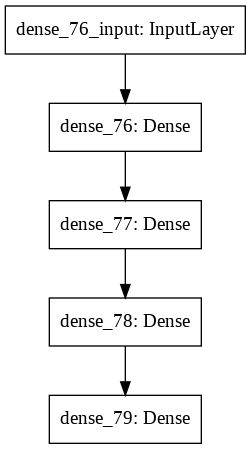

In [166]:
keras.utils.plot_model(model)

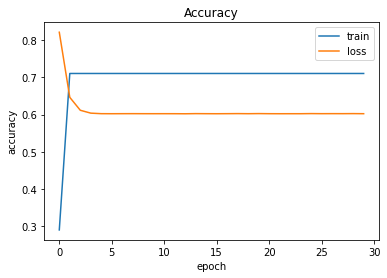

In [168]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='best')
plt.show()